In [2]:
from datetime import datetime
import pandas as pd

In [3]:
dates = pd.date_range('2020-04-04', '2020-06-02')
dates = dates.strftime('z%d-%B-%Y')

In [4]:
# dumb date manipulation
dates = dates.str.replace('z0', '').str.replace('z', '')

# basically we need to change '01-July-2020' into '1-July-2020'

In [7]:
scrapes = []

for date in dates[:1]:
    filename = f'COVID-19-daily-announced-deaths-{date}.xlsx'
    print(filename)
    try:
        raw_file = pd.read_excel(filename, sheet_name='COVID19 daily deaths by trust', skiprows=13)
    except:
        raw_file = pd.read_excel(filename, sheet_name='Tab4 Deaths by trust', skiprows=13)
    good_cols = [c for c in raw_file.columns 
                 if c in ['Name', 'Code'] or isinstance(c, datetime)]
    scrape = raw_file[good_cols].dropna(axis=0, how='all')
    scrape.iloc[0, 0] = 'ENG'
    scrape = scrape.set_index(['Name', 'Code']).unstack()
    
    # drop duplicates
    scrape = scrape[~scrape.index.duplicated(keep='last')]
    scrapes.append(scrape)

COVID-19-daily-announced-deaths-4-April-2020.xlsx


In [8]:
scrapes

[                                                   2020-03-03                  \
 Code                                                      ENG NN1 NW6 R0A R0B   
 Name                                                                            
 AIREDALE NHS FOUNDATION TRUST                             NaN NaN NaN NaN NaN   
 ASHFORD AND ST PETER'S HOSPITALS NHS FOUNDATION...        NaN NaN NaN NaN NaN   
 BARKING, HAVERING AND REDBRIDGE UNIVERSITY HOSP...        NaN NaN NaN NaN NaN   
 BARNSLEY HOSPITAL NHS FOUNDATION TRUST                    NaN NaN NaN NaN NaN   
 BARTS HEALTH NHS TRUST                                    NaN NaN NaN NaN NaN   
 ...                                                       ...  ..  ..  ..  ..   
 WORCESTERSHIRE HEALTH AND CARE NHS TRUST                  NaN NaN NaN NaN NaN   
 WRIGHTINGTON, WIGAN AND LEIGH NHS FOUNDATION TRUST        NaN NaN NaN NaN NaN   
 WYE VALLEY NHS TRUST                                      NaN NaN NaN NaN NaN   
 YEOVIL DISTRICT

In [220]:
final = pd.concat(scrapes, axis=1).sum(axis=1)

In [221]:
final = final.unstack().fillna(0)

In [224]:
final = final.cumsum()

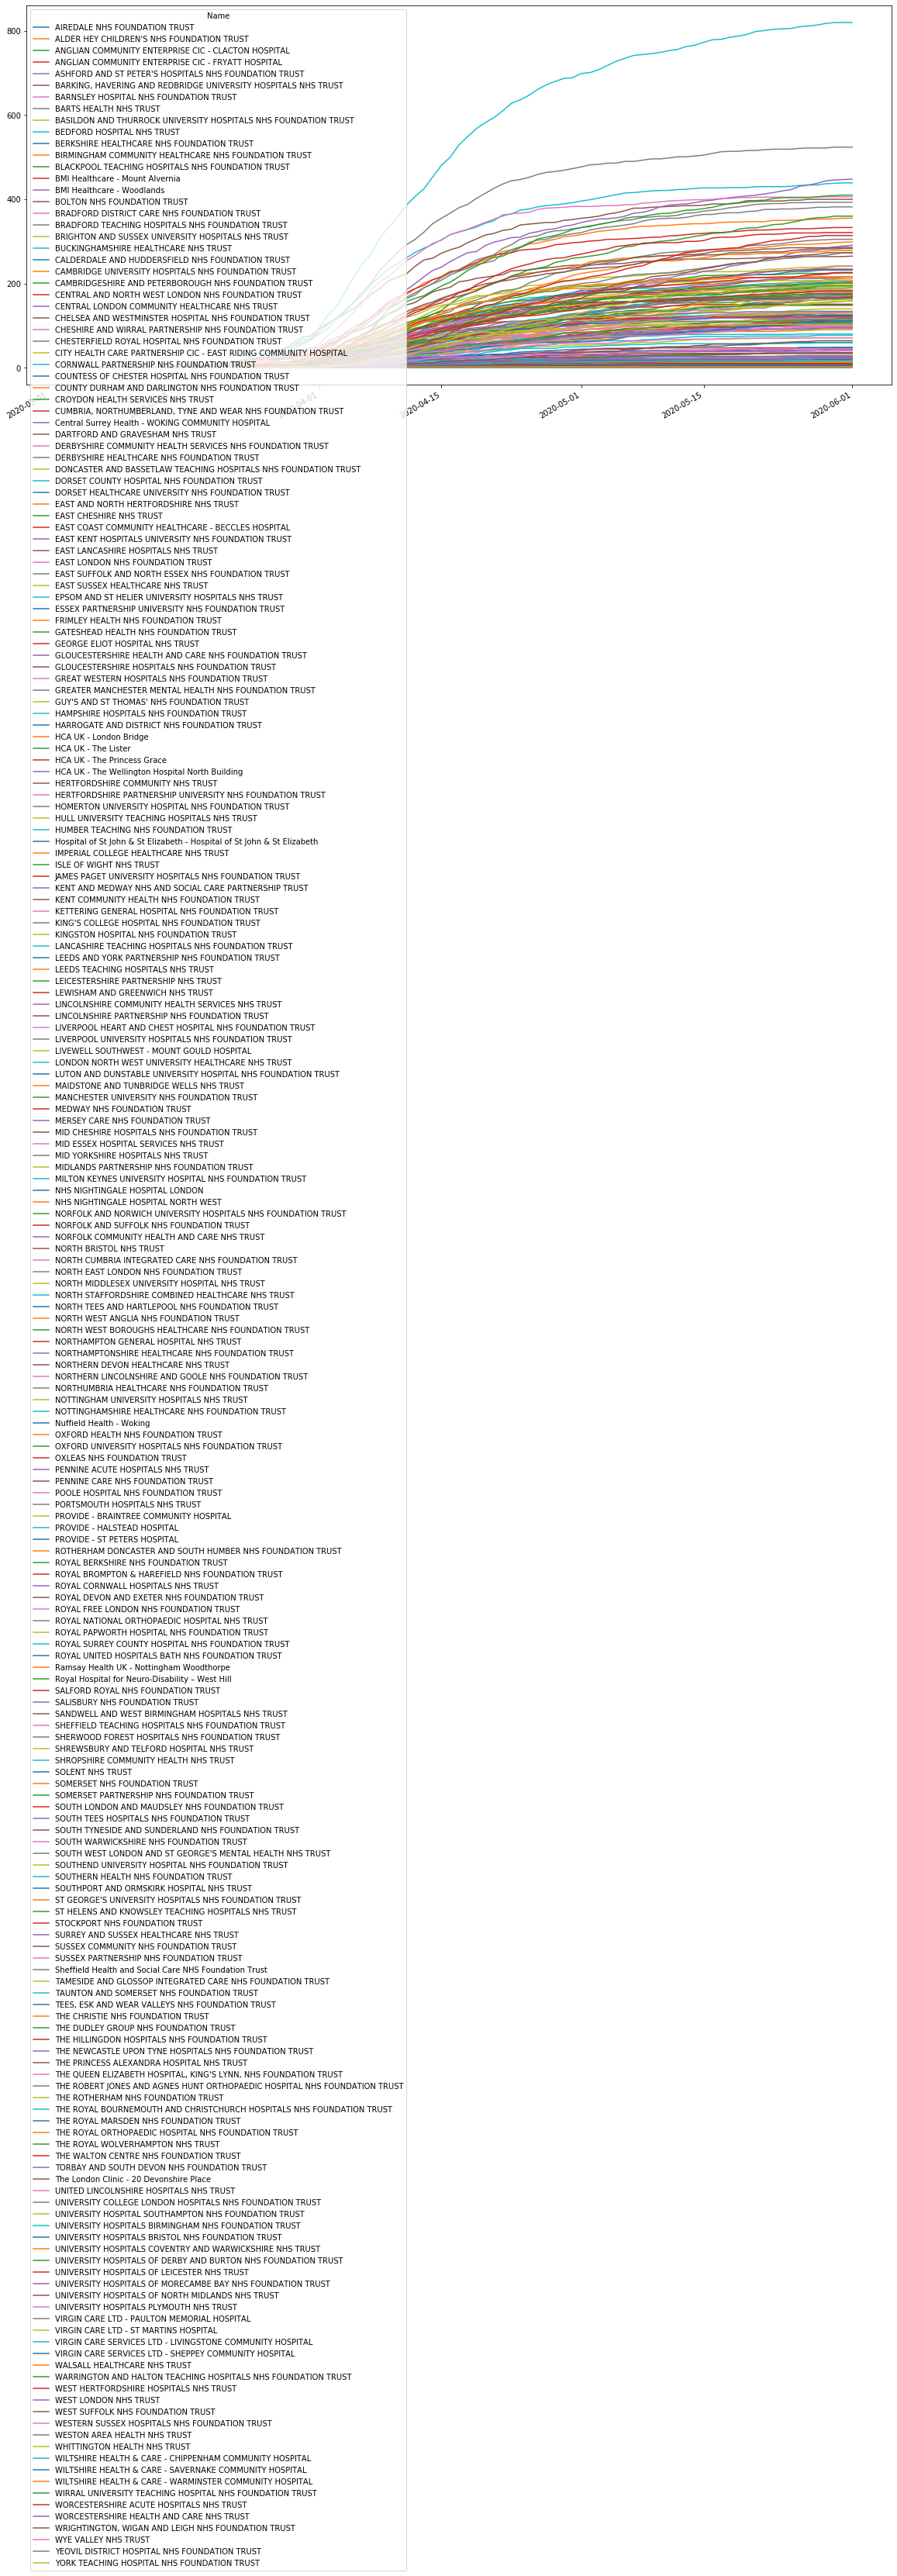

In [226]:
final.drop('ENG', axis=1).plot(figsize=(20,10))

In [228]:
final.to_csv('hospital_deaths.csv')